In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from tqdm import *
from plot import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [18]:
nmc = 10

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/FloatPS_indiv_floatDM_nodmless7_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=150, 
                        halos_to_keep=150,
                        data_type="mc",
                        elephantm = [0])
    limit_ary_temp, xsec_max_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,0,:]
    limit_ary[idm] = limit_ary_temp[-1,0,:]

In [19]:
xsec_max = np.log10(np.percentile(xsec_max_ary[:10], [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary[:10], [16,50,84], axis=1))

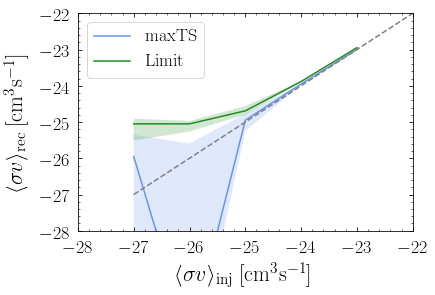

In [26]:
plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)

plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)

plt.plot([-27,-21],[-27,-21],ls='--', color='grey')

# plt.axvspan(limit_nodm[0],limit_nodm[2],color='firebrick',alpha=0.2)
# plt.axvline(limit_nodm[1],color='firebrick',alpha=1,ls='--', label="null Limit")


plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")

plt.ylim(-28,-22)
plt.xlim(-28,-22)


plt.legend()

In [20]:
print xsec_max_ary

[[  1.00000000e-23   1.00000000e-23   1.00000000e-23   1.00000000e-23
    1.00000000e-23   1.00000000e-23   1.00000000e-23   1.00000000e-23
    1.00000000e-23   1.00000000e-23]
 [  1.00000000e-24   1.12201845e-24   1.12201845e-24   1.12201845e-24
    1.00000000e-24   1.12201845e-24   1.25892541e-24   1.12201845e-24
    1.12201845e-24   1.12201845e-24]
 [  1.58489319e-25   2.51188643e-26   1.12201845e-25   1.12201845e-25
    1.77827941e-25   2.23872114e-25   7.07945784e-26   4.46683592e-26
    1.12201845e-25   7.94328235e-26]
 [  1.77827941e-26   1.25892541e-31   6.30957344e-26   1.00000000e-26
    1.00000000e-33   3.98107171e-32   1.58489319e-32   3.16227766e-26
    1.00000000e-32   1.00000000e-33]
 [  1.00000000e-33   2.23872114e-26   3.16227766e-26   1.99526231e-32
    4.46683592e-26   2.51188643e-32   8.91250938e-33   3.98107171e-32
    4.46683592e-26   5.01187234e-26]]


In [25]:
print np.arange(-23,-28,-1)

[-23 -24 -25 -26 -27]
